# Multi-layered Neural Network MPL 

In [5]:
# Imports :
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import time
import numpy as np

* Dowloanding the MNIST dataset :

In [14]:
mnist = fetch_openml('mnist_784', as_frame=False)

* Randomise data & target :


In [15]:
indices = np.random.randint(70000, size=70000)
data = mnist.data[indices]
target = mnist.target[indices]

* data spliting :

In [16]:
xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=49000)

* MLP with one Hidden Layer of 50 neurals :

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(50))

clf.fit(xtrain, ytrain)
prediction = clf.predict(xtest)
score = clf.score(xtest, ytest)
recall = metrics.recall_score(ytest, prediction, average = 'macro')
precision = metrics.precision_score(ytest, prediction, average ='macro')
loss0_1 = metrics.zero_one_loss(ytest, prediction)

> N.B :
***
 - for average = macro, we have : <br />
        - Score = (TP + TN)/(TP+TN+FP+FN) <br />
        - Précision = TP/(TP + FP)<br />
        - Recall = TP/(TP+FN)<br />
        - Zero one loss : standard loss function in classification (equivalent of squared error for regression)
 - for average = micro, it is the same thing.

* Test for the 4 image (prints):

This MLP model, with one layer of 50, has a score of :  96.85714285714285 %.
4th image : Prediction  5 Vs  Reel :  5


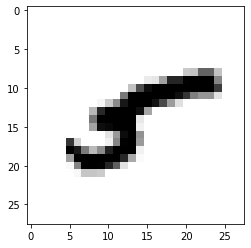

This MLP model has a precision of : 96.87697113403628 %.
This MLP model has a recall of :  96.83113394148636 %.
This MLP model has a zero-one_loss of : 96.83113394148636 %.


In [6]:
print("This MLP model, with one layer of 50, has a score of : ", score*100, "%.")
print("4th image : Prediction ",prediction[3], "Vs  Reel : ", ytest[3])

# Showing the 4th predicted image:

images = xtest.reshape((-1, 28, 28))
plt.imshow(images[3],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()


# Metrics :
print ("This MLP model has a precision of :", precision*100, "%.")
print ("This MLP model has a recall of : ",recall*100, "%.")
print ("This MLP model has a zero-one_loss of :",recall*100, "%.")

* Variation of layers number from 2 to 100 :


In [7]:
hidden_layer =(50,)*100

ScoreResult = []
PredResult = []
RecallResult = []
LossResult = []
#print(hidden_layer)
#print(hidden_layer[0:1])

for i in range (100):
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer[0:i])
    clf.fit(xtrain, ytrain)
    prediction = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    precision = metrics.precision_score(ytest, prediction, average='macro')
    recall = metrics.recall_score(ytest, prediction, average='macro')
    loss0_1 = metrics.zero_one_loss(ytest, prediction)

    ScoreResult.append(score)
    PredResult.append(precision)
    RecallResult.append(recall)
    LossResult.append(loss0_1)

    print("For ", i, "hidden layer (s), The score = ", score *100, "%", ", Precision = ", precision*100, "% .." )





For  0 hidden layer (s), The score =  88.77619047619048 % , Precision =  89.77712489039351 % ..
For  1 hidden layer (s), The score =  96.58571428571429 % , Precision =  96.58671859281552 % ..
For  2 hidden layer (s), The score =  97.32380952380953 % , Precision =  97.2928762932193 % ..
For  3 hidden layer (s), The score =  96.79523809523809 % , Precision =  96.77762940931771 % ..
For  4 hidden layer (s), The score =  97.82857142857144 % , Precision =  97.81775140090846 % ..
For  5 hidden layer (s), The score =  97.75714285714285 % , Precision =  97.75323454626668 % ..
For  6 hidden layer (s), The score =  97.6047619047619 % , Precision =  97.61683082786611 % ..
For  7 hidden layer (s), The score =  98.02857142857142 % , Precision =  98.00674224190178 % ..
For  8 hidden layer (s), The score =  98.24285714285715 % , Precision =  98.22005529842397 % ..
For  9 hidden layer (s), The score =  98.07142857142857 % , Precision =  98.05569394685298 % ..
For  10 hidden layer (s), The score =  98.

C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  39 hidden layer (s), The score =  60.285714285714285 % , Precision =  55.33209250529352 % ..
For  40 hidden layer (s), The score =  81.25238095238096 % , Precision =  81.25890312532637 % ..
For  41 hidden layer (s), The score =  70.28571428571428 % , Precision =  68.64976087817413 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  42 hidden layer (s), The score =  70.07142857142857 % , Precision =  67.93651683671975 % ..
For  43 hidden layer (s), The score =  66.54761904761905 % , Precision =  65.68889992312002 % ..
For  44 hidden layer (s), The score =  76.22380952380952 % , Precision =  76.1698648710215 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  45 hidden layer (s), The score =  76.1952380952381 % , Precision =  69.73568362815445 % ..
For  46 hidden layer (s), The score =  70.24285714285713 % , Precision =  70.19616136506833 % ..
For  47 hidden layer (s), The score =  85.4952380952381 % , Precision =  85.70244702668303 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  48 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  49 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..
For  50 hidden layer (s), The score =  79.45238095238095 % , Precision =  80.51099650498328 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  51 hidden layer (s), The score =  68.25714285714287 % , Precision =  64.42312199644155 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  52 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  53 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  54 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  55 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  56 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  57 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  58 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  59 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  60 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  61 hidden layer (s), The score =  10.371428571428572 % , Precision =  1.0371428571428571 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  62 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  63 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  64 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  65 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  66 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  67 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  68 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  69 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  70 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  71 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  72 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  73 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  74 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  75 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  76 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  77 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  78 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  79 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  80 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  81 hidden layer (s), The score =  10.371428571428572 % , Precision =  1.0371428571428571 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  82 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  83 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  84 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  85 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  86 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  87 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  88 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  89 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  90 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  91 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  92 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  93 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  94 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  95 hidden layer (s), The score =  10.371428571428572 % , Precision =  1.0371428571428571 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  96 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  97 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  98 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  99 hidden layer (s), The score =  11.447619047619048 % , Precision =  1.1447619047619049 % ..


> Priting this results :

In [8]:
print(ScoreResult)
print("\n")
print(PredResult)
print("\n")
print(RecallResult)
print("\n")
print(LossResult)

[0.8877619047619048, 0.9658571428571429, 0.9732380952380952, 0.9679523809523809, 0.9782857142857143, 0.9775714285714285, 0.976047619047619, 0.9802857142857143, 0.9824285714285714, 0.9807142857142858, 0.982, 0.9814761904761905, 0.9804761904761905, 0.9820476190476191, 0.9799523809523809, 0.9789523809523809, 0.9761904761904762, 0.9801904761904762, 0.9793333333333333, 0.9784761904761905, 0.9782380952380952, 0.9779047619047619, 0.9647619047619047, 0.9721904761904762, 0.9811428571428571, 0.9418571428571428, 0.9581904761904761, 0.9696190476190476, 0.9602857142857143, 0.9567619047619048, 0.9207619047619048, 0.8395714285714285, 0.8523809523809524, 0.9026666666666666, 0.8601428571428571, 0.9474761904761905, 0.7727619047619048, 0.8608095238095238, 0.8211904761904761, 0.6028571428571429, 0.8125238095238095, 0.7028571428571428, 0.7007142857142857, 0.6654761904761904, 0.7622380952380953, 0.7619523809523809, 0.7024285714285714, 0.8549523809523809, 0.11447619047619048, 0.11447619047619048, 0.794523809

In [23]:
print(type(PredResult))
newPredResult = (np.array(PredResult))


<class 'list'>


> Visualizing this results :

Text(0, 0.5, 'Zero-to-one Loss')

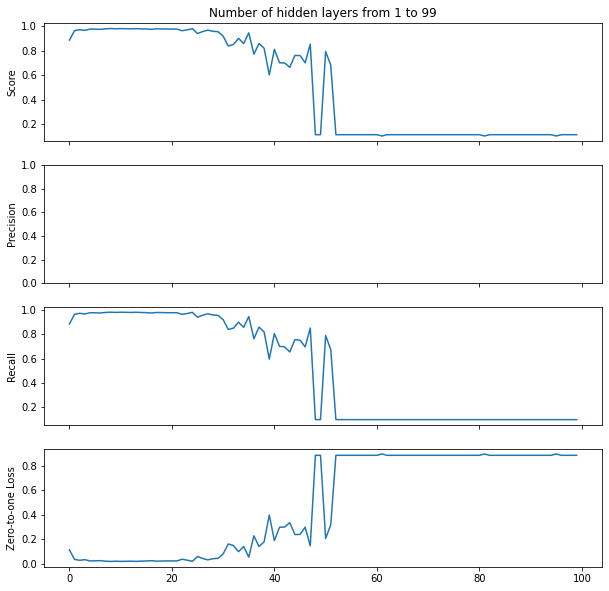

In [26]:
import matplotlib.pyplot as plt


fig, axarr = plt.subplots(4, sharex=True, figsize=(10,10))
axarr[0].plot(range(100), ScoreResult)
axarr[0].set_title('Number of hidden layers from 1 to 99')
axarr[0].set_ylabel('Score')
# axarr[1].plot(range(100), newPredResult)
axarr[1].set_ylabel('Precision')
axarr[2].plot(range(100), RecallResult)
axarr[2].set_ylabel('Recall')
axarr[3].plot(range(100), LossResult)
axarr[3].set_ylabel('Zero-to-one Loss')


* 5 MLP MNIST Models : 

> With 1 to 100 layers and 10 to 300 neurals !!

> Here we choice randomly our clf :

In [6]:
# 1 layer, max neurals
clf1 = MLPClassifier(hidden_layer_sizes=(300))
# 3 layers, random neurals
clf3 = MLPClassifier(hidden_layer_sizes=(20, 200, 50))
# 5 layers, gaussien neurals
clf5 = MLPClassifier(hidden_layer_sizes=(50, 100, 200, 100, 50))
# 7 layers, desin neurals :
clf7 = MLPClassifier(hidden_layer_sizes=(300, 250, 200, 150, 100, 50, 10))
# 9 layers, increase neurals :
clf9 = MLPClassifier(hidden_layer_sizes=(30, 60, 90, 120, 150, 180, 210, 240, 270))


In [8]:
ClassifierList = ("clf1", "clf3","clf5", "clf7", "clf9")

Score =[]
Precision = []
Recall = []
Loss = []
TimeTraining = []
TimePrediction = []

def runClfs(clf, i):

    #Training :
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()

    #Prediction :
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()

    #Metrics :
    score = clf.score(xtest,ytest)
    precision =  metrics.precision_score(ytest, predict,  average='macro')
    recall = metrics.recall_score(ytest, predict, average ='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred

    #Saving results
    Score.append(score*100)
    Precision.append(precision*100)
    Recall.append(recall)
    Loss.append(loss01)
    TimePrediction.append(timePred)
    TimeTraining.append(timetrain)

    #Prints :
    print("For the", i," model we have, score = ", score*100, "%, precision =",precision*100, "%." )
    print("   Training's time = ", timetrain, "(s) and prediction's time = ", timePred, "(s)." )
    



In [29]:
# Testing :
runClfs(clf1, 1)


For the 1  model we have, score =  97.9904761904762 %, precision = 97.96202151046141 %.
   Training's time =  321.85036849975586 (s) and prediction's time =  0.5119163990020752 (s).


In [30]:
runClfs(clf3, 2)


For the 2  model we have, score =  96.47142857142858 %, precision = 96.42963987626129 %.
   Training's time =  397.9223074913025 (s) and prediction's time =  32.40092945098877 (s).


In [31]:
runClfs(clf5, 3)


For the 3  model we have, score =  97.68571428571428 %, precision = 97.66047692912365 %.
   Training's time =  172.29315209388733 (s) and prediction's time =  0.49903249740600586 (s).


In [34]:
runClfs(clf7, 4)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the 4  model we have, score =  11.447619047619048 %, precision = 1.1447619047619049 %.
   Training's time =  724.2465023994446 (s) and prediction's time =  29.00931715965271 (s).


In [35]:
runClfs(clf9, 5)

For the 5  model we have, score =  97.70952380952382 %, precision = 97.70771656050788 %.
   Training's time =  744.4960463047028 (s) and prediction's time =  1.2009308338165283 (s).


> showing thne results :

In [36]:
print(Score)
print(Precision)
print(Recall)
print(Loss)
print(TimeTraining)
print(TimePrediction)

[98.43333333333332, 97.9904761904762, 96.47142857142858, 97.68571428571428, 11.447619047619048, 97.70952380952382]
[98.43507394997906, 97.96202151046141, 96.42963987626129, 97.66047692912365, 1.1447619047619049, 97.70771656050788]
[0.984086347234296, 0.9799160592502973, 0.9644925857184928, 0.9767746518046099, 0.1, 0.9767921185344012]
[0.015666666666666718, 0.020095238095238055, 0.035285714285714254, 0.02314285714285713, 0.8855238095238095, 0.022904761904761872]
[587.130660533905, 321.85036849975586, 397.9223074913025, 172.29315209388733, 724.2465023994446, 744.4960463047028]
[26.04603862762451, 0.5119163990020752, 32.40092945098877, 0.49903249740600586, 29.00931715965271, 1.2009308338165283]


> Visualizing this results :

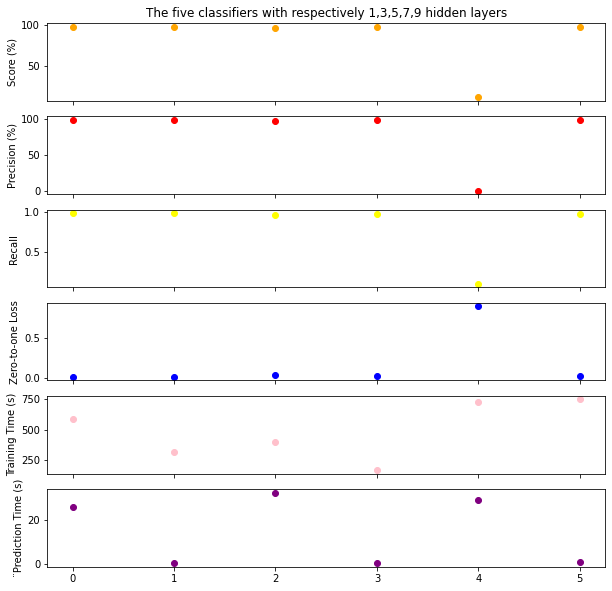

In [44]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(6), Score, c='orange')
axarr[0].set_title('The five classifiers with respectively 1,3,5,7,9 hidden layers')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(6), Precision, c='red')
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(6), Recall, c='yellow')
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(6), Loss, c='blue')
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(6), TimeTraining, c='pink')
axarr[4].set_ylabel('Training Time (s)')
axarr[5].scatter(range(6), TimePrediction, c='purple')
axarr[5].set_ylabel('¨Prediction Time (s)')

plt.show()

* Study the convergence of the available optimization algorithms: `L-BFGS`, `SGD` and `Adam` 

> LBFGS :  an optimizer in the family of quasi-Newton methods.. <br />
> SGD : stochastic gradient descent.. <br />
> ADAM : a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba..

In [9]:
# Our tuples (<==> i layer(s) with a random number of neurals) :
t1 = (30)
t3 = (20, 200, 50)
t5 = (50, 100, 200, 100, 50)
t7 = (300, 250, 200, 150, 100, 50, 10)
t9 = (30, 60, 90, 120, 150, 180, 210, 240, 270)

In [10]:
TotalScore = []
TotalPrecision = []
TotalRecall = []
TotalLoss = []
TotalTrainingTime =[]
TotalPredictionTime = []

In [17]:
def trySolver(tuple, solv, i):

    #Training :
    clf = MLPClassifier(hidden_layer_sizes = tuple, solver = solv)
    start1 = time.time()
    clf.fit(xtrain, ytrain)
    end1 = time.time()

    #Prediction :
    start2 = time.time()
    prediction = clf.predict(xtest)
    end2 = time.time()

    #Metrics :
    score = clf.score(xtest, ytest)
    precision = metrics.precision_score(ytest, prediction, average = 'macro')
    recall = metrics.zero_one_loss(ytest, prediction)
    loss0_1 = metrics.zero_one_loss(ytest, prediction)

    trainingTime = end1 - start1
    predictionTime = end2 - start2

    #Saving reults :
    TotalScore.append(score)
    TotalPrecision.append(precision)
    TotalRecall.append(recall)
    TotalLoss.append(loss0_1)
    TotalTrainingTime.append(trainingTime)
    TotalPredictionTime.append(predictionTime)

    # Printing results :
    print("For the Solver :: ", solv)
    print("for the ", i, "model we have, a score = ", score * 100, "%, precision = ", precision * 100, "%, training's time = ", trainingTime, "and a prediction's time = ", predictionTime, " .")
    



> Testing :

In [18]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t1, j, 1)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  1 model we have, a score =  79.0904761904762 %, precision =  79.05176930732128 %, training's time =  196.32854986190796 and a prediction's time =  0.7764620780944824  .
For the Solver ::  sgd
for the  1 model we have, a score =  87.71904761904761 %, precision =  87.67929165063524 %, training's time =  192.07735395431519 and a prediction's time =  1.7416398525238037  .
For the Solver ::  adam
for the  1 model we have, a score =  95.70476190476191 %, precision =  95.72408289235105 %, training's time =  358.43832993507385 and a prediction's time =  0.3560059070587158  .


In [19]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t3, j, 2)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  2 model we have, a score =  70.54761904761905 %, precision =  71.51353863066959 %, training's time =  333.0212616920471 and a prediction's time =  0.4140033721923828  .


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For the Solver ::  sgd
for the  2 model we have, a score =  90.9952380952381 %, precision =  90.92315838999433 %, training's time =  591.2617228031158 and a prediction's time =  10.417722702026367  .
For the Solver ::  adam
for the  2 model we have, a score =  97.18095238095238 %, precision =  97.14989516014272 %, training's time =  448.864266872406 and a prediction's time =  29.996471643447876  .


In [20]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t5, j, 3)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  3 model we have, a score =  97.83333333333334 %, precision =  97.81346958485389 %, training's time =  844.8463888168335 and a prediction's time =  43.120851039886475  .
For the Solver ::  sgd
for the  3 model we have, a score =  97.43333333333334 %, precision =  97.39703236171144 %, training's time =  715.48588514328 and a prediction's time =  16.42468571662903  .
For the Solver ::  adam
for the  3 model we have, a score =  97.90952380952382 %, precision =  97.90165701353841 %, training's time =  182.7492082118988 and a prediction's time =  0.4644899368286133  .


In [21]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t7, j, 4)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  4 model we have, a score =  98.02380952380952 %, precision =  97.99412682566141 %, training's time =  1593.3813166618347 and a prediction's time =  53.12957978248596  .


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the Solver ::  sgd
for the  4 model we have, a score =  11.014285714285714 %, precision =  1.1014285714285714 %, training's time =  273.30187225341797 and a prediction's time =  0.9999816417694092  .


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the Solver ::  adam
for the  4 model we have, a score =  11.014285714285714 %, precision =  1.1014285714285714 %, training's time =  243.5453577041626 and a prediction's time =  1.0197246074676514  .


In [22]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t9, j, 5)

C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  5 model we have, a score =  96.87142857142858 %, precision =  96.83860701567495 %, training's time =  1294.8211524486542 and a prediction's time =  46.234375953674316  .
For the Solver ::  sgd
for the  5 model we have, a score =  98.03809523809524 %, precision =  98.01561148579691 %, training's time =  458.9907810688019 and a prediction's time =  1.078120231628418  .
For the Solver ::  adam
for the  5 model we have, a score =  97.4952380952381 %, precision =  97.48111659713649 %, training's time =  701.2395927906036 and a prediction's time =  1.063002109527588  .


> Showing this results :

In [23]:
print(TotalScore)
print(TotalPrecision)
print(TotalRecall)
print(TotalLoss)
print(TotalTrainingTime)
print(TotalPredictionTime)

[0.7909047619047619, 0.8771904761904762, 0.957047619047619, 0.7054761904761905, 0.909952380952381, 0.9718095238095238, 0.9783333333333334, 0.9743333333333334, 0.9790952380952381, 0.9802380952380952, 0.11014285714285714, 0.11014285714285714, 0.9687142857142857, 0.9803809523809524, 0.9749523809523809]
[0.7905176930732128, 0.8767929165063524, 0.9572408289235105, 0.7151353863066958, 0.9092315838999433, 0.9714989516014272, 0.978134695848539, 0.9739703236171143, 0.9790165701353841, 0.9799412682566141, 0.011014285714285714, 0.011014285714285714, 0.9683860701567495, 0.9801561148579692, 0.9748111659713649]
[0.2090952380952381, 0.12280952380952381, 0.042952380952380964, 0.2945238095238095, 0.09004761904761904, 0.02819047619047621, 0.021666666666666612, 0.025666666666666615, 0.02090476190476187, 0.01976190476190476, 0.8898571428571429, 0.8898571428571429, 0.03128571428571425, 0.019619047619047647, 0.025047619047619096]
[0.2090952380952381, 0.12280952380952381, 0.042952380952380964, 0.294523809523

* Visualiziing this results :

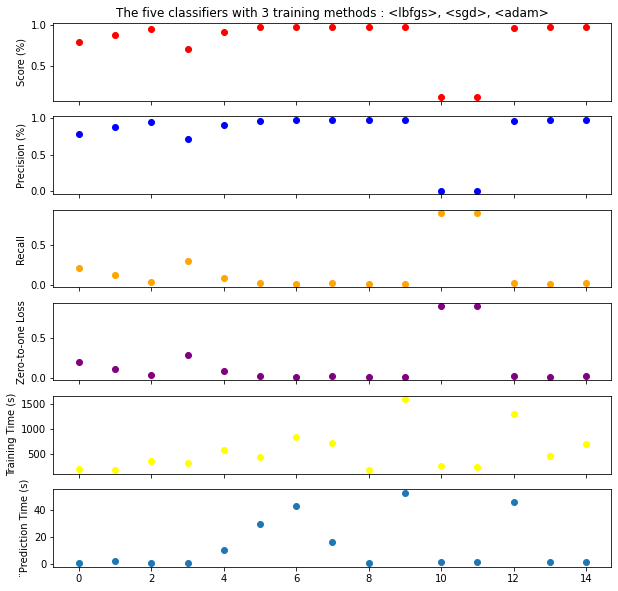

In [26]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))

axarr[0].scatter(range(15), TotalScore, c='red')
axarr[0].set_title('The five classifiers with 3 training methods : <lbfgs>, <sgd>, <adam>')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(15), TotalPrecision, c='blue')
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(15), TotalRecall, c='orange')
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(15), TotalRecall, c='purple')
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(15), TotalTrainingTime, c='yellow')
axarr[4].set_ylabel('Training Time (s)')
axarr[5].scatter(range(15), TotalPredictionTime)
axarr[5].set_ylabel('¨Prediction Time (s)')

plt.show()

* Variation of the Activation function :

In [27]:
TotalScore2 = []
TotalPrecision2 = []
TotalRecall2 = []
TotalLoss2 = []
TotalTrainingTime2 =[]
TotalPredictionTime2 = []

In [28]:
def trySomeActivationFcts(t, activation ,i) :
    #Training :
    clf = MLPClassifier(hidden_layer_sizes = t, activation = activation)
    start1 = time.time()
    clf.fit(xtrain, ytrain)
    end1= time.time()

    #Prediction :
    start2 = time.time()
    prediction = clf.predict(xtest)
    end2 = time.time()

    #Metrics :
    score = clf.score(xtest, ytest)
    precision = metrics.precision_score(ytest, prediction, average='macro')
    recall = metrics.recall_score(ytest, prediction, average='macro')
    loss0_1 = metrics.zero_one_loss(ytest, prediction)

    trainingT = end1 - start1
    predictionT = end2 - start2

    # Saving the results :
    TotalScore2.append(score)
    TotalPrecision2.append(precision)
    TotalRecall2.append(recall)
    TotalLoss2.append(loss0_1)
    TotalTrainingTime2.append(trainingT)
    TotalPredictionTime2.append(predictionT)

    #Print the results :
    print("For the activation function : ", activation)
    print("for the, ", i, " model, the score = ",score * 100, "%, precision = ", precision * 100, "%, training'time = ", trainingT, "(s) and the prediction's time is = ", predictionT, " (s).")
     


> Testing :

In [29]:
for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t1, j, 1)

In [ ]:
for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t3, j, 2)

In [ ]:

for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t5, j, 3)

In [ ]:

for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t7, j, 4)

In [ ]:

for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t9, j, 5)

> Showing the results :

In [ ]:
print(TotalScore2)
print(TotalPrecision2)
print(TotalRecall2)
print(TotalLoss2)
print(TotalTrainingTime2)
print(TotalPredictionTime2)

> Visualizing this reults :

In [ ]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(20), TotalScore2)
axarr[0].set_title('The five classifiers with different activation functions : identity, logistic, tanh, relu')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(20), TotalPrecision2)
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(20), TotalRecall2)
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(20), TotalLoss2)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(20), TotalTrainingTime2)
axarr[4].set_ylabel('Training Time(s)')
axarr[5].scatter(range(20), TotalPredictionTime2)
axarr[5].set_ylabel('¨Prediction Time(s)')

plt.show()

* Variation of alpha (Regulisation value L2)

In [ ]:
alphas = np.logspace(-5, 3, 5)
FinalScore = []
FinalPrecision = []
